# Run Multiple Classifiers

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

In [20]:
import os
import urllib.request

data_url = 'https://raw.githubusercontent.com/elephantscale/datasets/master/credit-card-default/default.csv'
data_location = os.path.basename(data_url)

if not os.path.exists (data_location):
    print("Downloading : ", data_url)
    urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: default.csv


In [21]:
data = pd.read_csv(data_location)
data.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
8401,8402,20000,1,1,2,27,-1,-1,2,-1,...,780,390,1320,2200,0,780,0,1320,0,0
15135,15136,150000,1,1,2,53,0,0,0,0,...,0,0,0,5000,3000,0,0,0,0,0
4315,4316,20000,2,2,2,26,0,0,0,0,...,6584,3403,3748,2600,1500,1500,1000,402,0,0
20259,20260,80000,2,3,1,57,0,0,-2,-1,...,9618,10455,11131,0,0,9618,1000,1000,1000,0
20594,20595,50000,1,2,1,32,0,0,0,0,...,27836,40346,38668,27004,1613,1484,3675,698,1000,1


In [22]:
label_col = 'default'

feature_columns = data.columns
feature_columns = feature_columns.drop (['ID', 'default'])
#print (feature_columns)

In [23]:

X = data[feature_columns]
y = data[[label_col]]

print (X.shape)
print (y.shape)

(30000, 23)
(30000, 1)


In [24]:
from sklearn.model_selection import train_test_split

## TODO : split data into train / test, with 20% for test
## hint : 20% is 0.2

X_train,X_test,y_train, y_test = train_test_split(X,y,  test_size=0.2, random_state=123)


print ("x_train :" , X_train.shape )
print ("x_test :", X_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train : (24000, 23)
x_test : (6000, 23)
y_train : (24000, 1)
y_test : (6000, 1)


## Setup Algorithms

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

algorithms = [
    LogisticRegression(max_iter=500),
    RandomForestClassifier(),
    LinearSVC(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    SGDClassifier(),
    DecisionTreeClassifier()
]

## Run Algorithms and print stats


============== Running LogisticRegression(max_iter=500) ======
Training time : 0.2 secs (182.2 ms)
Prediction time : 0.0 secs (0.9 ms)
Training score :  0.77775
Testing score :  0.7825
Confusion matrix : 
      0  1
0  4695  1
1  1304  0


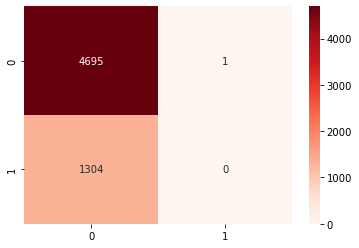


============== Running RandomForestClassifier() ======
Training time : 3.7 secs (3,654.2 ms)
Prediction time : 0.1 secs (83.8 ms)
Training score :  0.9993333333333333
Testing score :  0.8161666666666667
Confusion matrix : 
      0    1
0  4404  292
1   811  493


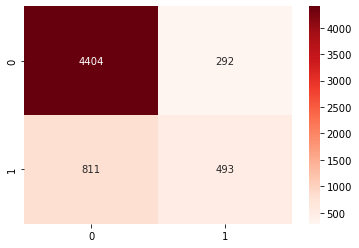


============== Running LinearSVC() ======
Training time : 1.7 secs (1,669.8 ms)
Prediction time : 0.0 secs (1.1 ms)
Training score :  0.5965
Testing score :  0.5945
Confusion matrix : 
      0     1
0  3176  1520
1   913   391


/home/sujee/anaconda3/envs/pyspark/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


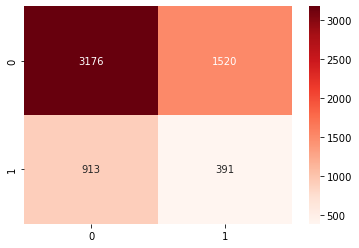


============== Running GradientBoostingClassifier() ======
Training time : 5.3 secs (5,276.2 ms)
Prediction time : 0.0 secs (6.0 ms)
Training score :  0.8256666666666667
Testing score :  0.8228333333333333
Confusion matrix : 
      0    1
0  4440  256
1   807  497


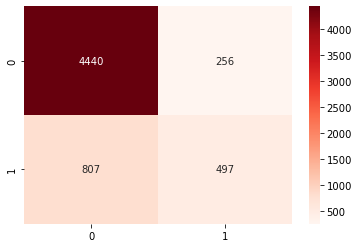


============== Running KNeighborsClassifier() ======
Training time : 0.0 secs (1.7 ms)
Prediction time : 2.1 secs (2,128.2 ms)
Training score :  0.8161666666666667
Testing score :  0.759
Confusion matrix : 
      0    1
0  4326  370
1  1076  228


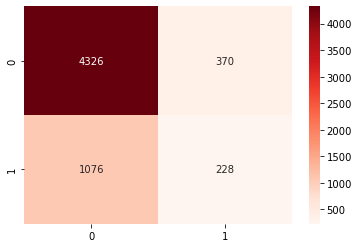


============== Running SGDClassifier() ======
Training time : 0.2 secs (181.4 ms)
Prediction time : 0.0 secs (1.1 ms)
Training score :  0.389
Testing score :  0.394
Confusion matrix : 
      0     1
0  1678  3018
1   618   686


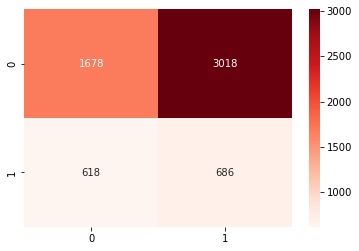


============== Running DecisionTreeClassifier() ======
Training time : 0.3 secs (325.6 ms)
Prediction time : 0.0 secs (1.7 ms)
Training score :  0.9993333333333333
Testing score :  0.7205
Confusion matrix : 
      0    1
0  3767  929
1   748  556


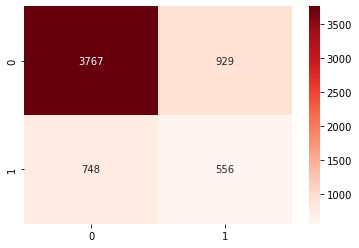

In [26]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_labels = np.unique(y)
    
for algo in algorithms:
    print ()
    print ("============== Running {} ======".format(algo))
    t1 = time.perf_counter()
    model = algo.fit (X_train, np.ravel(y_train))
    t2 = time.perf_counter()
    y_pred = model.predict(X_test)
    t3 = time.perf_counter()
    
    cm_array = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
    
    print ("Training time : {:,.1f} secs ({:,.1f} ms)".format ( (t2-t1), (t2-t1)*1e3))
    print ("Prediction time : {:,.1f} secs ({:,.1f} ms)".format ( (t3-t2), (t3-t2)*1e3))
    print ("Training score : ", model.score(X_train, y_train))
    print ("Testing score : ", model.score(X_test, y_test))
    print ("Confusion matrix : ")
    print (cm_df)
    
    plt.figure(figsize = (6,4))
    # colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
    sns.heatmap(cm_df, annot=True, cmap="Reds", fmt='d').plot()
    plt.show()
    
    
